In [1]:
# Initialize notebooks and control figure layout #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os
from IPython.display import Image

plt.rcParams['axes.grid'] = True                       # turns grid background on
plt.rcParams['figure.constrained_layout.use'] = True   # tight layout, controlled whitespace
plt.rcParams['axes.linewidth'] = 2                     # thickness of axes

small, medium, large = 16, 20, 24
plt.rc('font', family='serif', size=small)             # controls default text sizes
plt.rc('axes', titlesize=large)                        # fontsize of the axes title
plt.rc('axes', labelsize=medium)                       # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)                       # fontsize of the tick labels
plt.rc('ytick', labelsize=small)                       # fontsize of the tick labels
plt.rc('legend', fontsize=small)                       # legend fontsize
plt.rc('figure', titlesize=large)                      # fontsize of the figure title

In [ ]:
# To call functions from other notebooks for the first time run: 
# !pip install ipynb

**Introduction**: Industrially, granular flows are encountered in many processes such as agriculture, pharmaceutical, and biotechnology manufacturing. It is estimated that over 70% of the raw materials of these processes are non-spherical. [[Ref. 1]](https://doi.org/10.1016/j.powtec.2016.07.010) Moreover, they play an important role in natural phenomena such as sediment transport and erosion. These illustrate the many economic and environmental incentives to increase the efficiency when handling granular materials. Normally, these particles are of non-spherical shapes. A major challenge associated with modeling non-spherical particles is that the flow can induce preferred particle orientations. These orientations lead to large changes in the flow dynamics, which are predominantly dependent on particle size and shape. Understanding this phenomenon is essential for modeling the behavior of complex granular systems. Discrete element method (DEM) simulations have proven to be applicable in
modeling non-spherical granular flows by considering the complex behavior between particles. Through past DEM simulations, we have the ability to analyze the orientation of non-spherical particles in shear flow. We are interested in the emergent patterns arising from various types of non-spherical shapes which we will investigate by using Python. These results are expected to translate into a deeper understanding of granular flow behavior and a more accurate predictive
granular model.


# Overview and Demonstration

Hello World! :) This repository is used to analyze the orientation angles of non-spherical particles created by DEM simulations and stored as binary files. For more specific details, see the notebooks organized below, which are meant to be utilized in order:

1. **Get Data**: Reads data and stores it

2. **Initial Explore**: Visualizes data (scatter plot, gifs) and overviews angle behavior

3. **Angles & Binning**: Deeper flow and angle analysis, and visualizes angle 
orientation

However, this notebook is to serve as a general overview of the code and results. It simply imports functions from the other notebooks in order to loop over all the original binary files. I would suggest starting here and then diving into the more in-depth notebooks.

## Demonstration
This section of the code is to serve as a brief demonstration over how to use the notebooks. The notebook functions will automatically save the figures to a folder titled the function name. A directory tree can be seen below: 

**Project Folder**


- Notebooks
- Raw Data Folder

    - Binary Files (eg. output_DR_2_2__2_8_P.bin)
    
- DataFrames Folder

    - DataFrame Files (eg. 2228_CleanDF)

- Figures Folder
    - scImage Folder
    - scMlabImage Folder
    - scMlabGif Folder
    - etc...

Let's say we have a binary file titled output_DR_2_2__2_8_P.bin. The first step is to read the data, store the data into a dataframe, and then do something with the data. 

In [2]:
# import functions from other notebooks #
from ipynb.fs.defs._1_Get_Data import ReadData, WholeDF, CleanDF

# read the data #
filename = 'output_DR_2_2__2_8_P.bin'
data, T = ReadData('RawData/'+filename, 0, 100, 90000)

# store into a dataframe #
df_whole = WholeDF(data, filename, 0)
df_clean = CleanDF(df_whole)

# save the dataframe for later use #
df_clean.to_pickle('DataFrames/'+df_clean.index.name+'_CleanDF')

C:\Users\emmye\Desktop\UmbanhowarLab\Final Project\_1_Get_Data.ipynb:109: RuntimeWarning: invalid value encountered in double_scalars
  "        'y': data[3,:,frame],\n",
C:\Users\emmye\Desktop\UmbanhowarLab\Final Project\_1_Get_Data.ipynb:110: RuntimeWarning: invalid value encountered in double_scalars
  "        'z': data[4,:,frame],\n",


The data is saved to a dataframe named with the axis lengths, so 'output_DR_2_2__2_8_P.bin' becomes '2228', which is much easier to work with. 

In [3]:
# visualize dataframe # 
name = '2228'
df_test_clean = pd.read_pickle('DataFrames/'+name+'_CleanDF')
df_test_clean.head(3)

,x,y,z,a,b,c,M,thetay,thetaz,uprime,v,w,u,zprime,xprime
2228,,,,,,,,,,,,,,,
2,0.129618,0.029526,0.315643,0.001,0.001,0.001,"[[-0.6224925159136152, -0.4175879279535099, -0...",-51.603625,26.996248,0.001963,0.002313,-0.002385,0.000315,0.003241,0.141506
3,0.134824,0.013902,0.313001,0.001,0.001,0.001,"[[-0.6836695122570284, 0.5525053569799885, -0....",-67.336677,-39.669313,0.000554,0.000121,-0.000199,-0.001051,0.003047,0.147341
4,0.101337,0.007187,0.329050,0.001,0.001,0.001,"[[-0.15948910013402823, -0.867154590325327, 0....",86.265340,83.006088,0.001043,0.000908,0.000881,-0.000519,0.003440,0.110209


Now, we want to manipulate the data in some way. Let's say plot the overall angle statistics. 

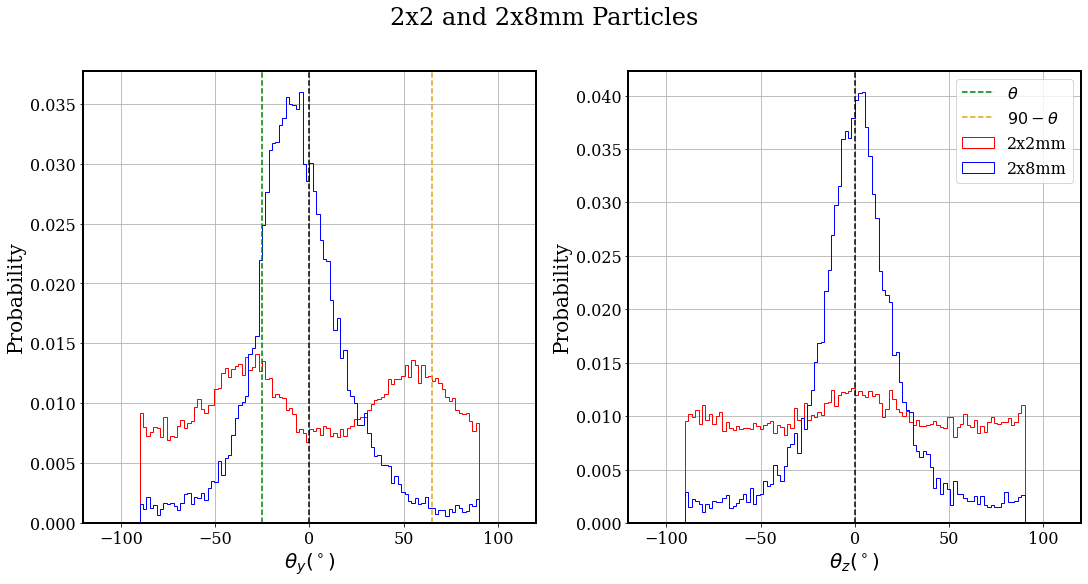

In [4]:
# import function from other notebook #
from ipynb.fs.defs._2_Initial_Explore import totProbDistr 

# utilize function #
totProbDistr(name)

It's that easy! :) For a deeper look into how each function works, we refer the reader to the notebooks.

# 1 Get Data
This notebook contains code that reads the binary data as a 3D matrix (ReadData), stores it into a dataframe (WholeDF), and then performs more calculations that are to be used later (CleanDF). We can read every binary file in the 'RawData' folder and store the respective whole and cleaned dataframes into the folder 'DataFrames'. The dataframes are saved according to their particle dimensions and type. 
    For example, a cleaned dataframe of 2x2 and 2x4mm particle simulation is saved as 2224_CleanDF. 

The functions are defined as: 


- ReadData(filename, startN, endN, maxParticles): Reads binary file and outputs 3d matrix and final frame count.
    
    - filename: name of binary file
    - startN: frame start time
    - endN: frame end time
    - maxParticles: max number of particles stored in matrix
   
- WholeDF(data, filename, frame): Reads 3d matrix at a specific time and outputs a dataframe of the entire data

    - data: 3D matrix data (from ReadData)
    - filename: name of binary file
    - frame: time frame to be stored (1)
    
- CleanDF(df): Reads dataframe and outputs a new dataframe with Xprime and Zprime. Also excludes feed zone.

    - df: dataframe to be cleaned (from WholeDF)

In [ ]:
from ipynb.fs.defs._1_Get_Data import ReadData, WholeDF, CleanDF

In [ ]:
# Loops over all binary data and stores a Whole and Clean dataframe #
for filename in os.listdir('RawData'):
    data0, T0 = ReadData('RawData/'+filename, 0, 1, 90000)
    data, T = ReadData('RawData/'+filename, int(T0)-100, int(T0), 90000)
    df_whole = WholeDF(data, filename, 0)
    df_whole.to_pickle('DataFrames/'+df_whole.index.name+'_WholeDF')
    df_clean = CleanDF(df_whole)
    df_clean.to_pickle('DataFrames/'+df_clean.index.name+'_CleanDF')

We can check to see if the code works by calling an arbitrary saved dataframe.

To use the files later, we need to be able to loop over the names. Therefore, we can write a .txt file containing the names.  

In [ ]:
# write a .txt with filenames #
with open('filenames.txt', 'a') as the_file:
    for filename in os.listdir('DataFrames'):
        if filename.endswith('_CleanDF'):
            name = filename[0:4]
            the_file.write(str(name)+'\n')

The following code is a sample of the code used to loop over the names with the function, 'function.' This code will be used to extensively to gather data on every data simulation.

In [ ]:
# sample code #
with open('filenames.txt') as file:
    for name in file:
        function(name)

# 2 Initial Explore
In this notebook, we want to take a look at the data we are working with. To do this we first render the whole dataframe as a scatter plot in matplotlib (scImage) and then mayavi (scMlabImage). We then can get a better understanding of the data by rendering a GIF of 100 frames of data (scMlabGif). 

Then, we want to get an overview of the orientation angles by plotting the total probability distribution (totProbDistr) and error bars (errorBars) of the data excluding the feed zone. 

The functions are as follows: 

- scImage(name):3D Scatterplot of a certain time, defined by the dataframe (df). Rendered in Matplotlib.

    - name: Name of saved data in the form '2228', for example. 
    
- scMlabImage(name):3D Scatterplot of a certain time, defined by the dataframe (df). Rendered in Mayavi.
- scMlabGif(filename): Renders a 3D GIF of the data for 100 frames. Matplotlib.

    - filename: actual saved filename of data.
    
- totProbDistr(name): imports clean dataframe and calculates the probabilities of thetay and thetaz.
- errorBars(name): creates error bars of thetay and thetaz plotted against Xprime.

In [ ]:
from ipynb.fs.defs._2_Initial_Explore import scImage, scMlabImage, scMlabGif
from ipynb.fs.defs._2_Initial_Explore import totProbDistr, errorBars

First, we can plot the scatter plots to get a sense of the separation and the length of each data simulation. 

In [ ]:
with open('filenames.txt') as file:
    for name in file:
        scImage(name.rstrip('\n'))
        scMlabImage(name.rstrip('\n'))

We can compare the 2x2 and 2x4 simulation with the 2x2 and 2x8 simulation. We do this to take two limiting cases with size ratios of 2 and 4. 

![](figure1.png)

Second, we can plot scatter plot animations of each data simulation to regard any characteristics such as avalanching. 

In [ ]:
for filename in os.listdir('RawData'):
    scMlabGif(filename)

![](figure2.png)

From these figures, we can observe that segregation occurs much more with the larger size ratio. However, since it is clear that the 2x4 simulation is much shorter, it is hard to decide whether the simulation is long enough to induce segregation. The animation helps visualize the flowing layer of the data. In future endeavors, we would recommend comparing simulations with similar length, and only analyzing the flowing layer. Our code analysis the entirety of data, excluding the feed zone.

We can get a sense of the orientation behavior by plotting the overall probability histograms and error bar plots.

In [ ]:
with open('filenames.txt') as file:
    for name in file:
        totProbDistr(name.rstrip('\n'))
        errorBars(name.rstrip('\n'))

![](figure3.png)

From the probability distributions is is clear to see that the rods have a strong preference of angling in line with the slope at 0 deg and angling at an inclination slightly less than the slope degrees at -25. The small error bars on the $\theta_y$ plot correlate to the fact the histograms at each bin are most likely normal. The disks, on the other hand, do not have as strong a preference. In the top graphs, there is a peak at the slope, $\theta$, and at 90 minus the slope, $90-\theta$. This corresponds to that the disks are most likely pushed against rods. The lack of a peak at 0 is because these simulations do not have side walls. If there were side walls, we would see a peak like in [Zhao et. al's Paper](https://doi.org/10.1002/aic.16035). 

To deeper understand the effect of location and visualize the meaning of the angles, see notebook 3 Angles & Binning.

# 3 Angles & Binning
This notebook provides a visualization tool for the meaning of the angles and also deeper understanding of the statistics of the orientation angles by binning the data in 5 locations. 

- overProfile(name): this function takes a cleaned dataframe and outputs an overview of the binning profile including the evolution of flow and velocity profiles.

    - name: name of saved data in the form '2228', for example.
    
- probProfile(name): gives concentration, thetay and thetaz probabilities for both types of particles, for 5 bins.

While not a defined function, we can visualize the meaning of $\theta_y$ and $\theta_z$ graphically and numerically with code inside this notebook. Examples include:

![](exampleparticle.png)
![](exampleangles.png)


In [ ]:
from ipynb.fs.defs._3_Angles_Binning import overProfile, probProfile

In [ ]:
with open('filenames.txt') as file:
    for name in file:
        overProfile(name)
        probProfile(name)

![](figure4.png)

The flow time evolution shows how the thickness from the slope, or z', gradually increases over time. The thickness varies substantially with the streamwise position, x'. While our investigations did not consider the flowing layer thickness, we strongly suggest future investigations take this into account. The bottom row shows the velocity profile and velocity profile normalized over the largest velocity in the bins. In general, the particles move faster closer to the feed zone and slower near the end boundary wall. The velocity decreases from the maximum at the free surface. 




![](figure5.png)

Focusing on the rod-like particles, the larger length-to-diameter aspect ratio corresponds to a taller probability peak. In addition, there is no apparent pattern correlation to the bin location or depth associated with the disks. For the rods, as x' increases, there was no notable effect on angle statistics. However, for z', the middle layers had the strongest probability functions. On average, the rod concentration increases as z' increases. Therefore, the bottom layers have a low concentration of rod particles. The top layers have a higher velocity and movement. Both of these factors might attribute to the middle layers having the tallest peaks. 

# Conclusion and Future Work
Particle shape affects many aspects of creating an accurate predictive granular flow model. The methodology for analyzing particle orientation of bounded heap flow has been laid out.

The orientation of rod-like particles tend to position themselves with the principal axis aligned with the flow and slope. The larger the length-to-diameter aspect ratio, the more strongly this is true. The distributions of angles means that the rods are generally sliding over each other. For disk-like particles, there is a definite bimodal pattern that arises for $\theta_y$, most likely due to aligning themselves with the rods. 

Although the results obtained have provided insight into nonspherical particle behavior, future investigation is needed. We suggest a deeper analysis into disk-like particles and their preferred orientations. In addition, we advocate exploring simulations in which the rods vary in length and diameter. We also want to look into how the orientation for rod-like particles is impacted by other particle in flow. For example, how would the orientations change for rod-rod simulations or sphere-rod simulations? We also suggest analyzing the orientation for longer simulation time, perhaps starting at time zero, and analyzing how long it takes for preferred orientation to develop. 
